In [5]:
%matplotlib inline
import weak_sauce as ws
import weak_sauce.data_tools
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

from weak_sauce.movers import UniformGaussianMover
from weak_sauce.grid import MoveableGrid
from weak_sauce.sources import Source
from weak_sauce.movers import UniformIlluminationMover, FixedIlluminationMover
from weak_sauce.fit_flat import FlatFitter

full_amp_img = np.load('../data/lsst_ultraflat_75ke_amp3.npy')
fitted = ws.data_tools.fitIlluminationVariation(full_amp_img)
data_rel_flux_map = (full_amp_img-fitted)/fitted+1

In [9]:
def runTestAna(small_img):
    data_like_source = Source(num_x=small_img.shape[1]+1,num_y=small_img.shape[0]+1) 
    data_like_source.fluxes += 1 #fit to flat field
    small_img = small_img.transpose()
    data_mg = FlatFitter(data_like_source,small_img)
    data_mg.fit(maxiter=300,verbose=False, step_size=1e-2,learning_rate_decay=1e-5)

    data_mg.source.plot(small_img, pcolormesh_kwargs_in={'linewidths':0})
    plt.title('Data')
    data_mg.source.plot(small_img - data_mg.source.fluxes, pcolormesh_kwargs_in={'linewidths':0})
    plt.title('Data-Model')
    plt.figure()
    plt.title('Image Histograms')
    _ = plt.hist([small_img.flatten(), data_mg.source.fluxes.flatten()],
                 bins=50, histtype='step',label=['Data','Model'])
    plt.legend()
    plt.figure()
    plt.title('Residuals')
    _ = plt.hist((data_mg.source.fluxes - small_img).flatten(),bins=50)

The weak_sauce fitter works great for (even large) **square** cutouts from larger chips:

Cutout Size: (300, 300)
maxiter reached


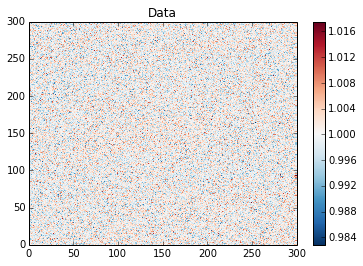

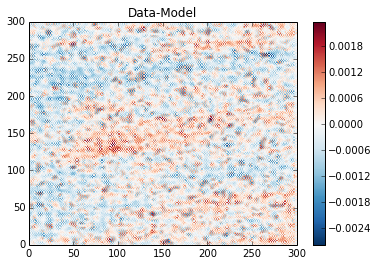

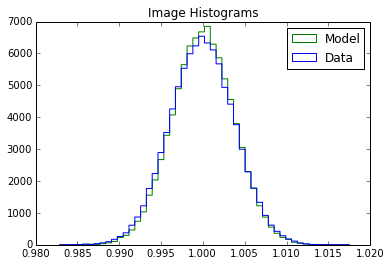

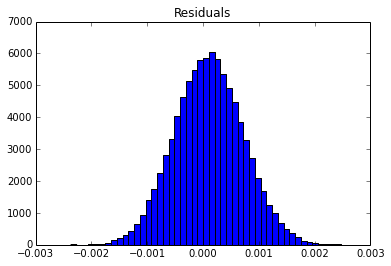

In [13]:
small_img = data_rel_flux_map[500:800,100:400]
print 'Cutout Size:', small_img.shape
runTestAna(small_img)

However, as the cutout gets more and more non-square, there's a strange offset in the pixel sizes that I don't understand. It occurs at the edges of the cutout, and increases in magnitude as the cutout gets more and more non-square:

Cutout Size: (299, 300)
maxiter reached


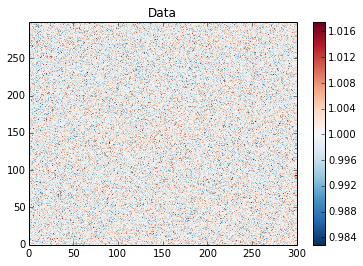

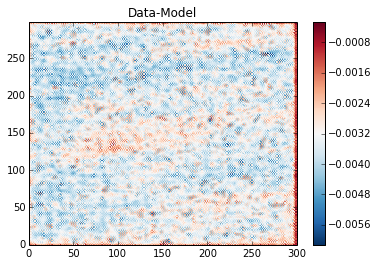

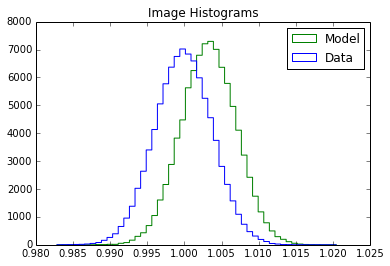

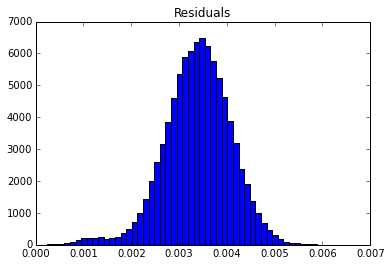

In [11]:
small_img = data_rel_flux_map[500:799,100:400]
print 'Cutout Size:', small_img.shape
runTestAna(small_img)

When one dimension is half the size of the other, the model once to make all the fluxes twice as big as they should be...

Cutout Size: (150, 300)
maxiter reached


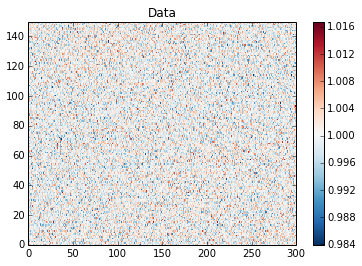

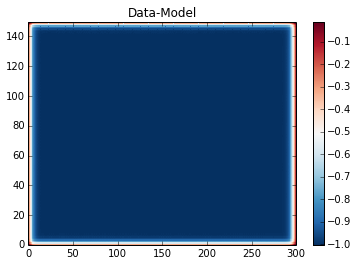

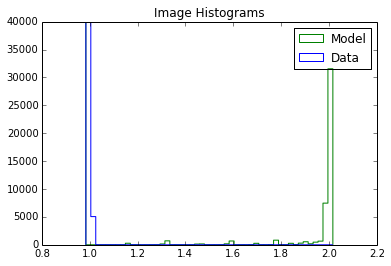

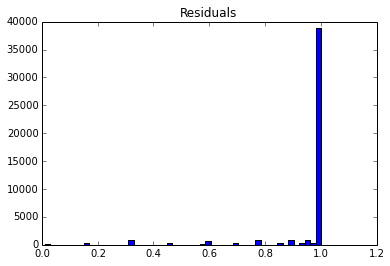

In [12]:
small_img = data_rel_flux_map[500:650,100:400]
print 'Cutout Size:', small_img.shape
runTestAna(small_img)